In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import autoencoder_train
import network
import utils

In [5]:
datadir = "/home/cjw/disk2cjw/Data/cyto/FiveChannels"
#datadir = "/home/cjw/disk2cjw/Data/yeast/"
mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/home/cjw/disk2cjw/Data/cyto/FiveChannels/Fish6_15.tif.mm', '/home/cjw/disk2cjw/Data/cyto/FiveChannels/Fish6_CCB.tif.mm', '/home/cjw/disk2cjw/Data/cyto/FiveChannels/Fish6_ICE.tif.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_15.tif.mm', 'Fish6_CCB.tif.mm', 'Fish6_ICE.tif.mm'])

In [6]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 4) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'dropout_3/mul:0' shape=(?, 2, 2, 1024) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 256), dtype=float32)
isize:  2 32
[<tf.Tensor 'dropout_4/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 2, 2, 1024) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'dropout_6/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_7/mul:0' shape=(?, 16, 16, 128) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 32, 32, 4), dtype=float32)
Epoch:  0 Iteration:  0 Loss:  529.752


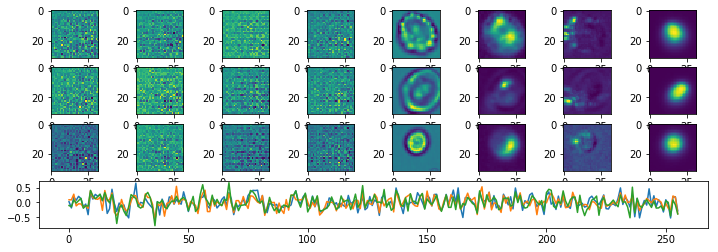

Epoch:  1 Iteration:  0 Loss:  76.2773


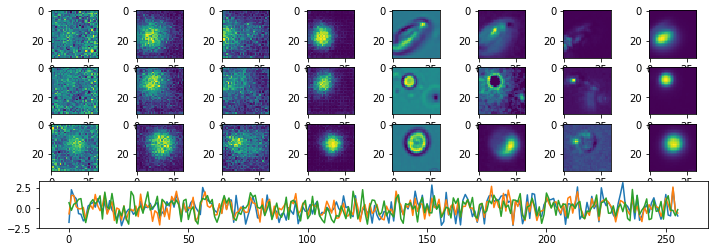

Epoch:  2 Iteration:  0 Loss:  52.5982


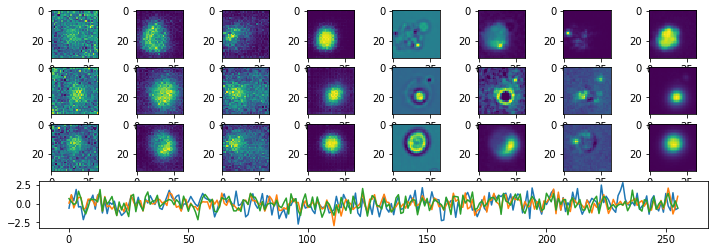

Epoch:  3 Iteration:  0 Loss:  44.1584


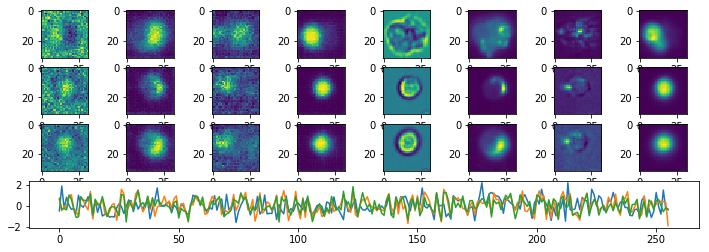

Epoch:  4 Iteration:  0 Loss:  39.8306


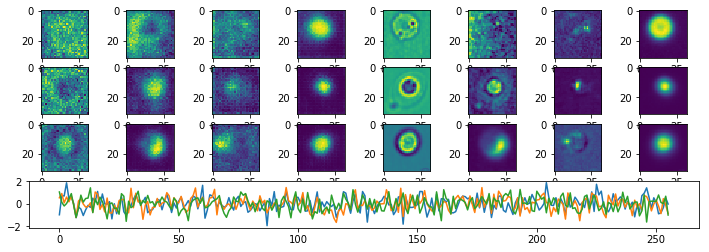

Epoch:  5 Iteration:  0 Loss:  35.9287


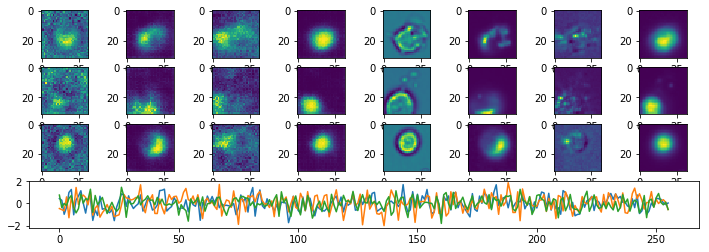

Epoch:  6 Iteration:  0 Loss:  33.2994


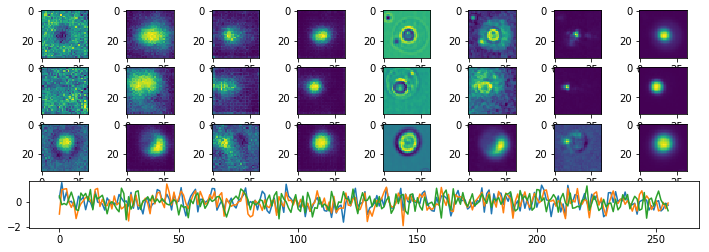

Epoch:  7 Iteration:  0 Loss:  31.203


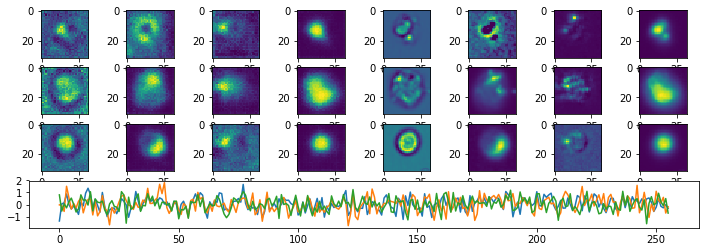

Epoch:  8 Iteration:  0 Loss:  29.4652


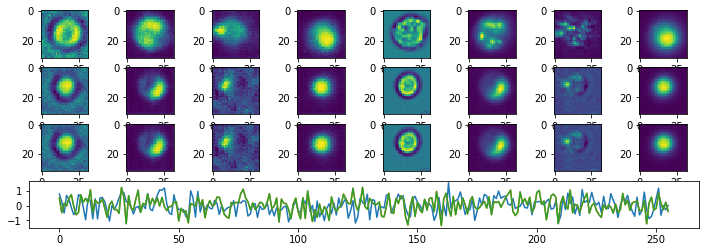

Epoch:  9 Iteration:  0 Loss:  28.1012


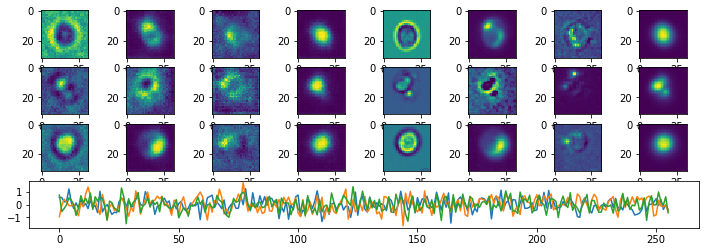

Epoch:  10 Iteration:  0 Loss:  26.4697


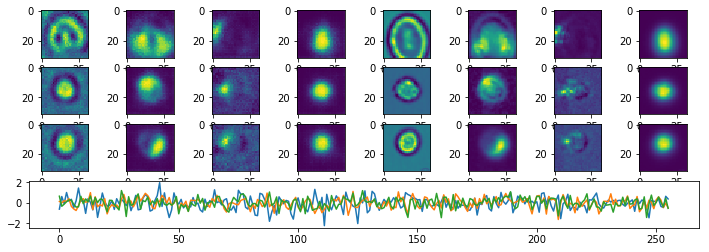

Epoch:  11 Iteration:  0 Loss:  25.0871


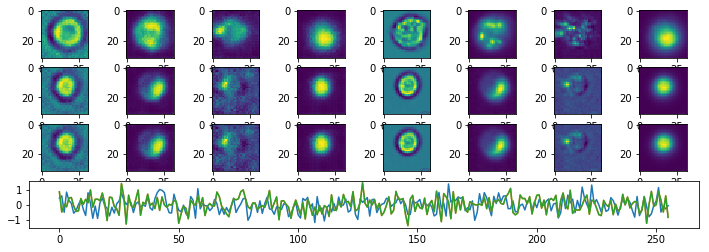

Epoch:  12 Iteration:  0 Loss:  24.1142


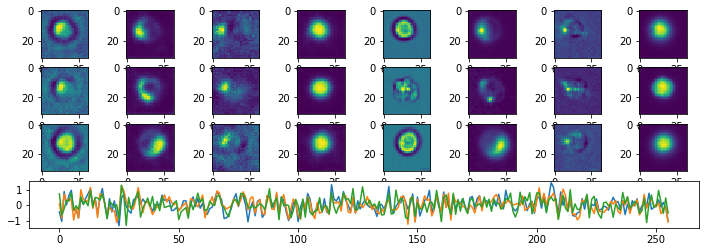

Epoch:  13 Iteration:  0 Loss:  23.4076


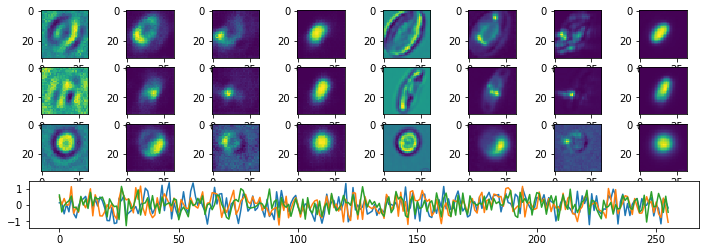

Epoch:  14 Iteration:  0 Loss:  22.3626


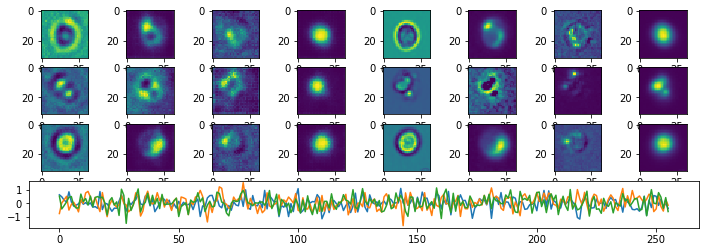

Epoch:  15 Iteration:  0 Loss:  21.5354


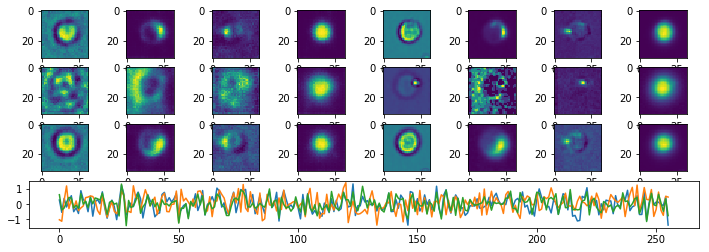

Epoch:  16 Iteration:  0 Loss:  20.8631


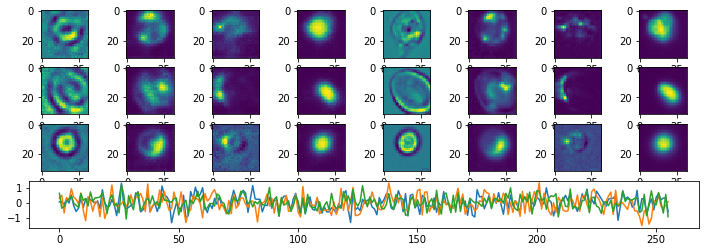

Epoch:  17 Iteration:  0 Loss:  20.1229


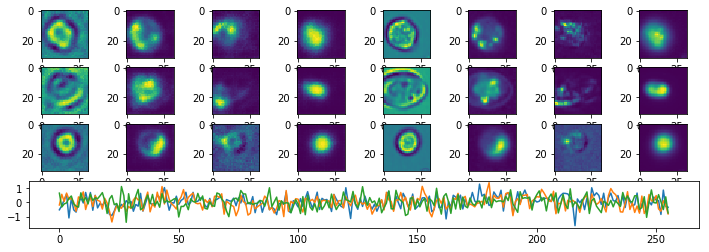

Epoch:  18 Iteration:  0 Loss:  19.5505


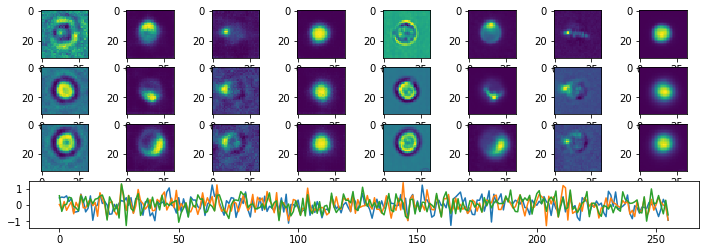

Epoch:  19 Iteration:  0 Loss:  18.969


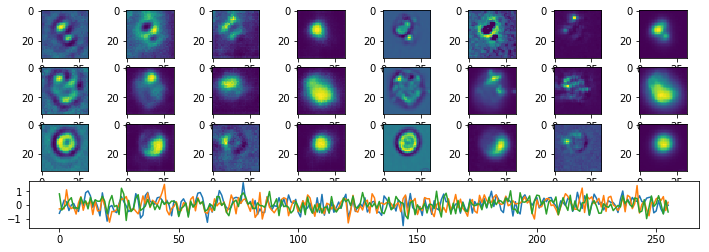

Epoch:  20 Iteration:  0 Loss:  18.5544


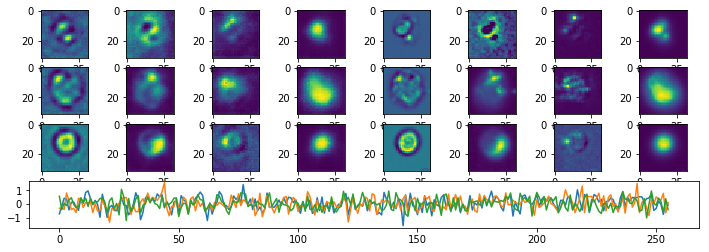

Epoch:  21 Iteration:  0 Loss:  18.0261


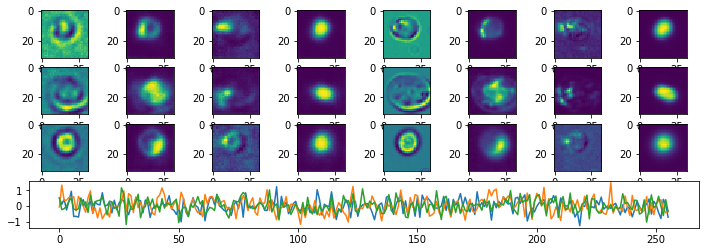

Epoch:  22 Iteration:  0 Loss:  18.0066


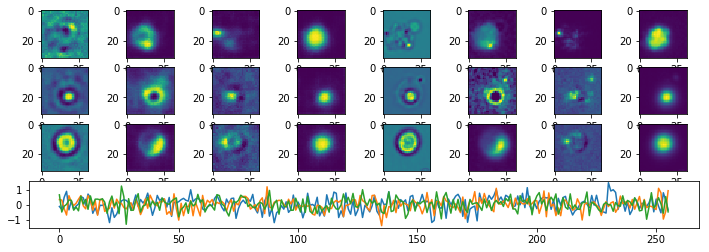

Epoch:  23 Iteration:  0 Loss:  17.0692


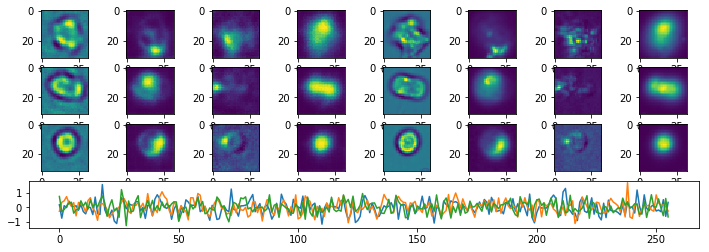

Epoch:  24 Iteration:  0 Loss:  16.7113


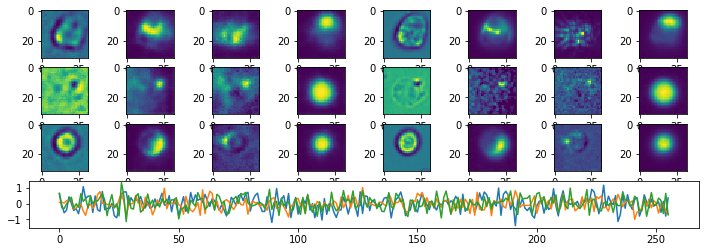

Epoch:  25 Iteration:  0 Loss:  16.5171


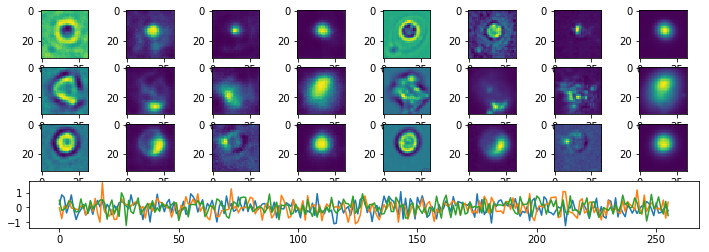

Epoch:  26 Iteration:  0 Loss:  16.2388


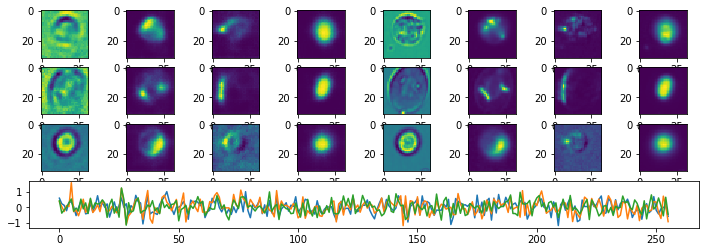

Epoch:  27 Iteration:  0 Loss:  15.8934


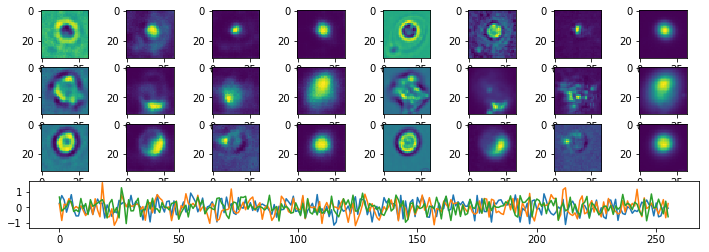

Epoch:  28 Iteration:  0 Loss:  15.5753


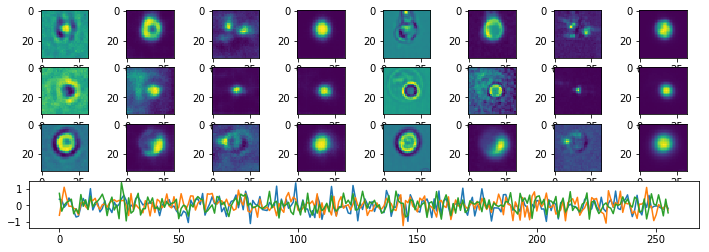

Epoch:  29 Iteration:  0 Loss:  15.2908


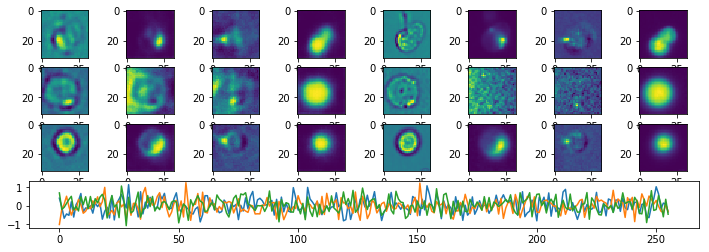

Epoch:  30 Iteration:  0 Loss:  14.9735


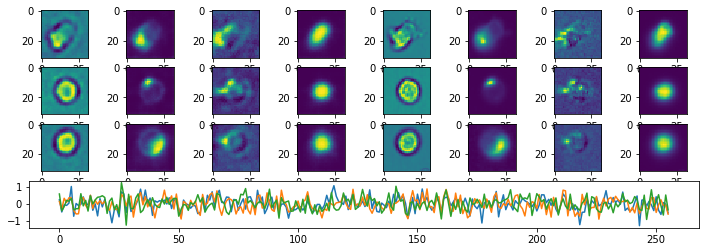

Epoch:  31 Iteration:  0 Loss:  14.8497


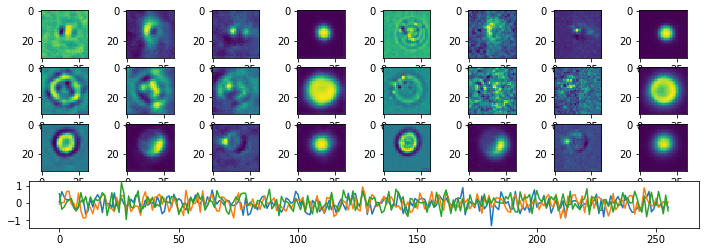

Epoch:  32 Iteration:  0 Loss:  14.5197


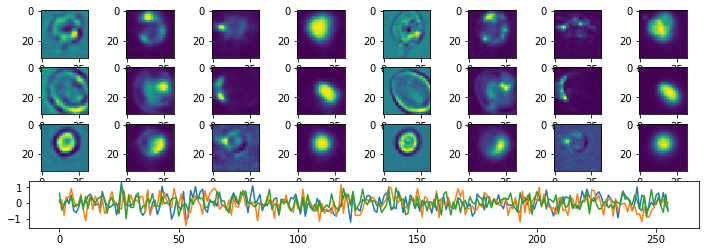

Epoch:  33 Iteration:  0 Loss:  14.1488


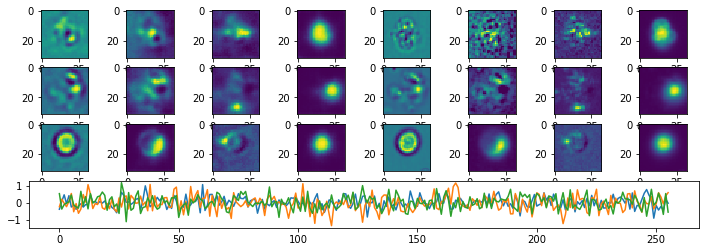

Epoch:  34 Iteration:  0 Loss:  14.0668


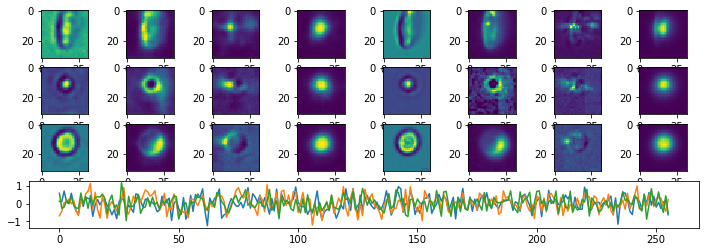

Epoch:  35 Iteration:  0 Loss:  13.8306


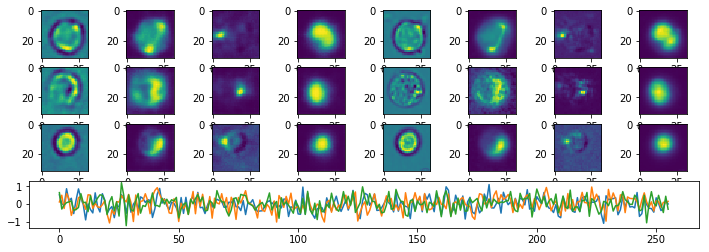

Epoch:  36 Iteration:  0 Loss:  13.5309


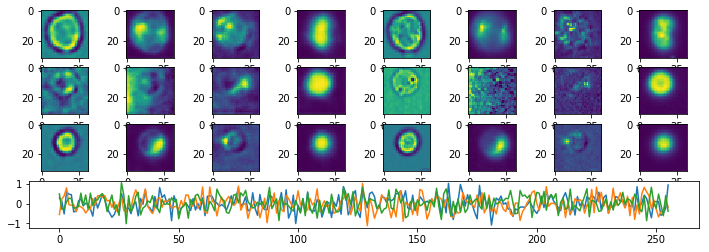

Epoch:  37 Iteration:  0 Loss:  13.2984


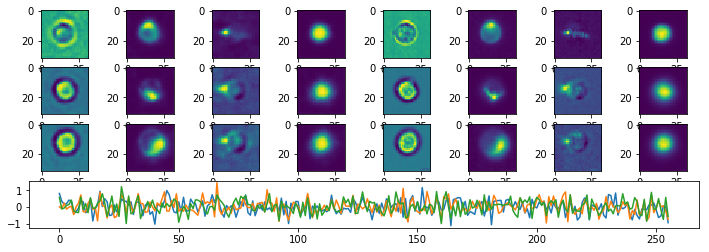

Epoch:  38 Iteration:  0 Loss:  13.2715


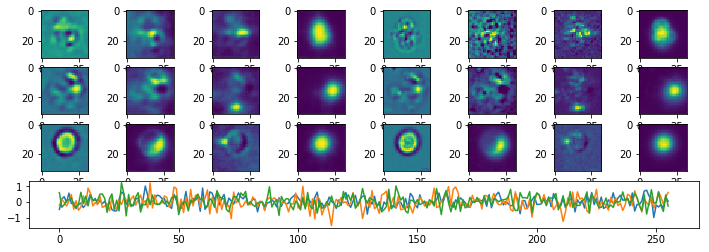

Epoch:  39 Iteration:  0 Loss:  12.9726


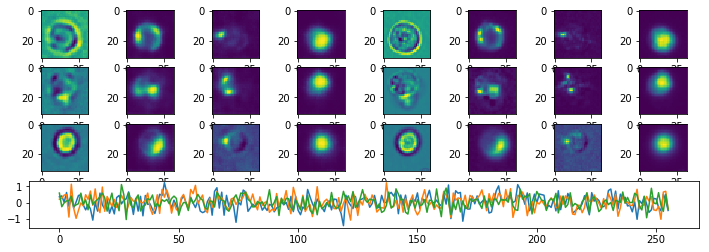

Epoch:  40 Iteration:  0 Loss:  12.9158


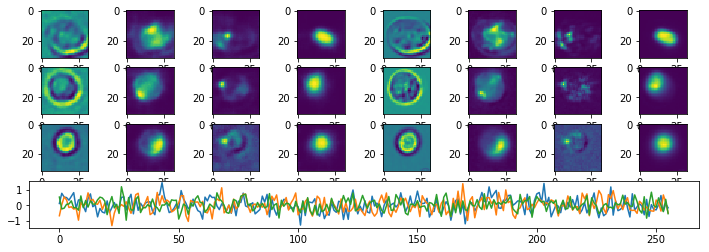

Epoch:  41 Iteration:  0 Loss:  12.9433


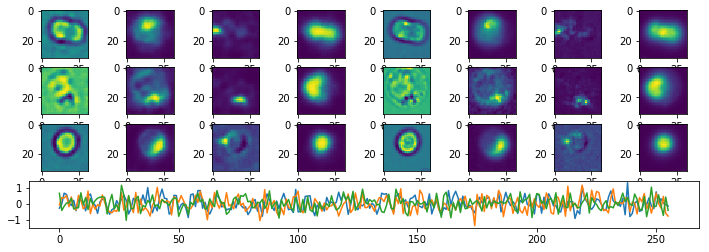

Epoch:  42 Iteration:  0 Loss:  12.6397


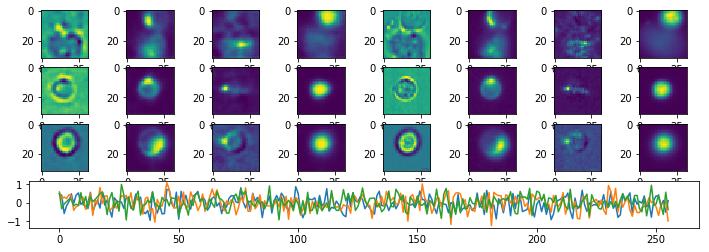

Epoch:  43 Iteration:  0 Loss:  12.4223


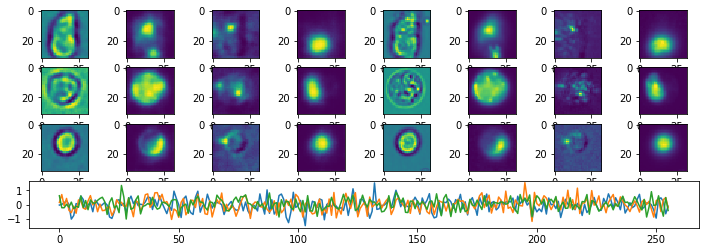

Epoch:  44 Iteration:  0 Loss:  12.2291


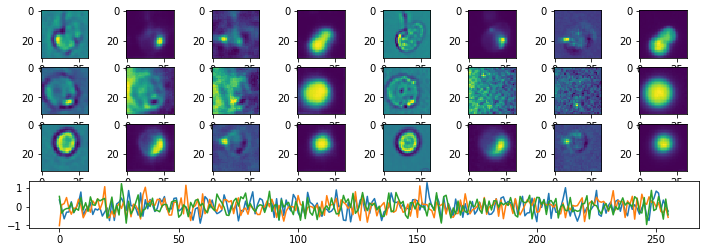

Epoch:  45 Iteration:  0 Loss:  12.2734


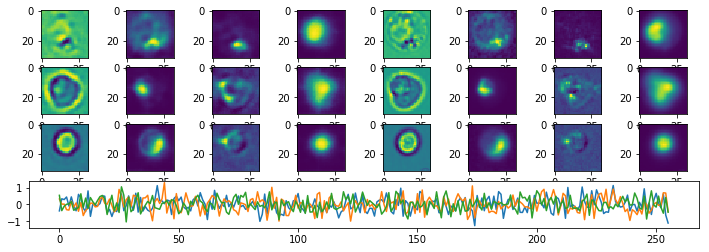

Epoch:  46 Iteration:  0 Loss:  12.0297


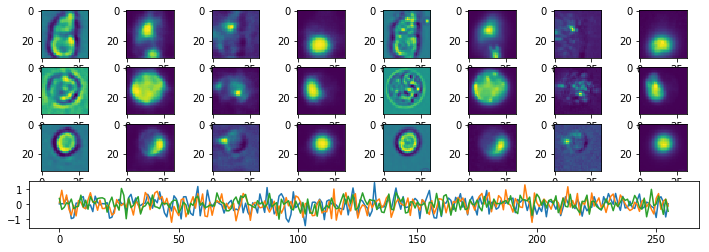

Epoch:  47 Iteration:  0 Loss:  11.9885


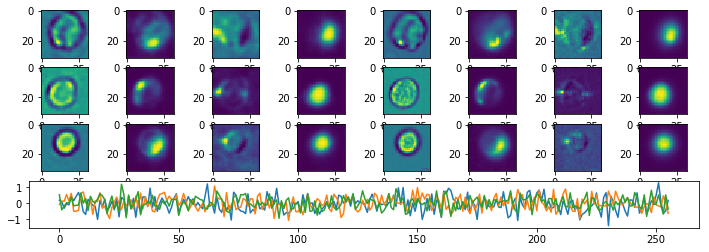

Epoch:  48 Iteration:  0 Loss:  11.835


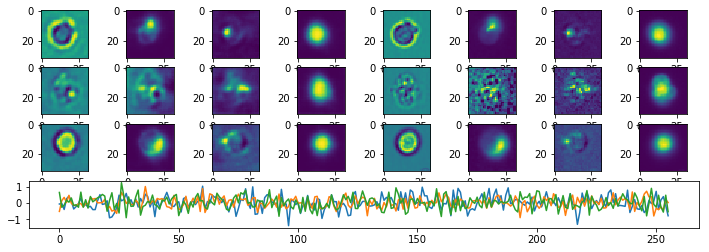

Epoch:  49 Iteration:  0 Loss:  11.6725


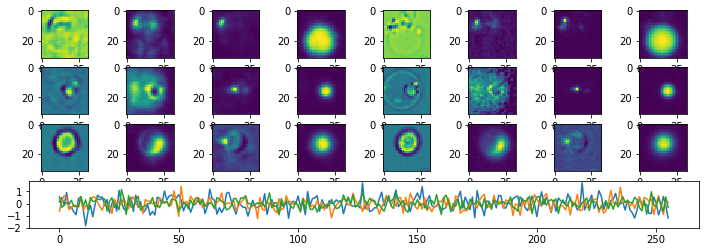

Epoch:  50 Iteration:  0 Loss:  11.6158


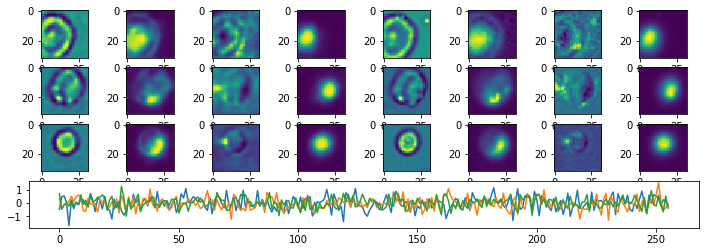

Epoch:  51 Iteration:  0 Loss:  11.5807


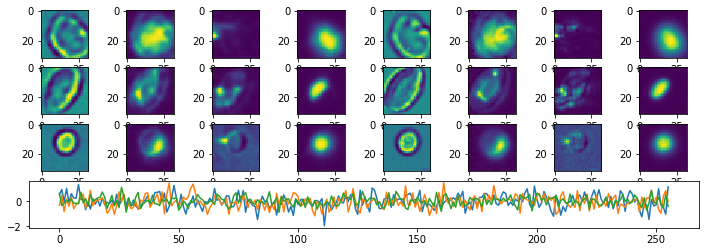

Epoch:  52 Iteration:  0 Loss:  11.2988


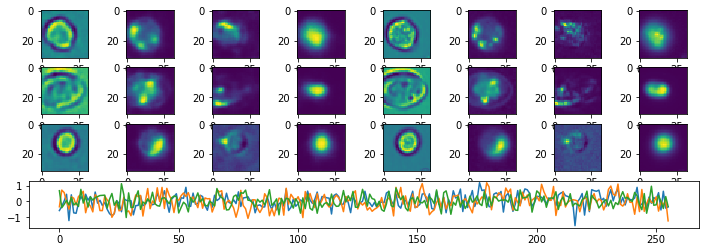

Epoch:  53 Iteration:  0 Loss:  11.2911


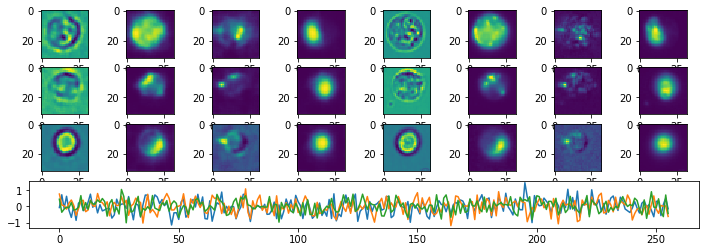

Epoch:  54 Iteration:  0 Loss:  11.2562


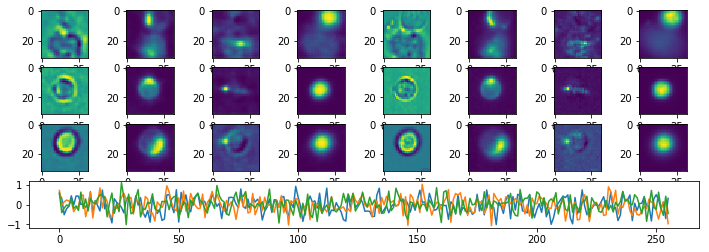

Epoch:  55 Iteration:  0 Loss:  11.1759


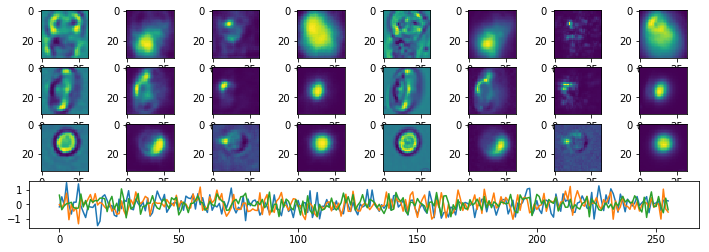

Epoch:  56 Iteration:  0 Loss:  11.0433


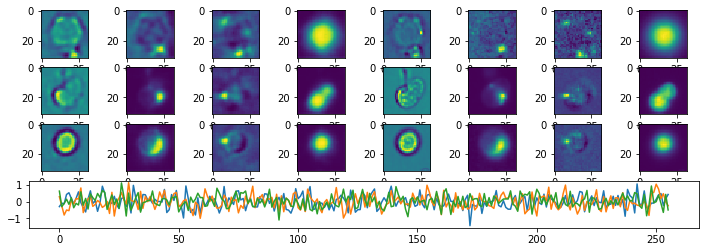

Epoch:  57 Iteration:  0 Loss:  10.9097


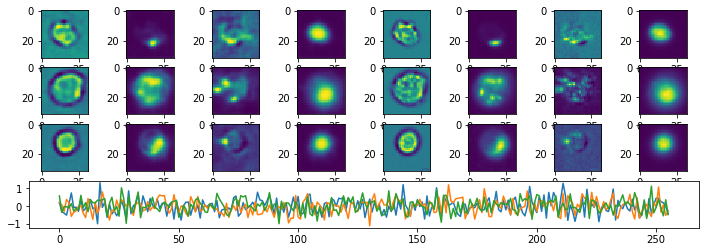

Epoch:  58 Iteration:  0 Loss:  10.8677


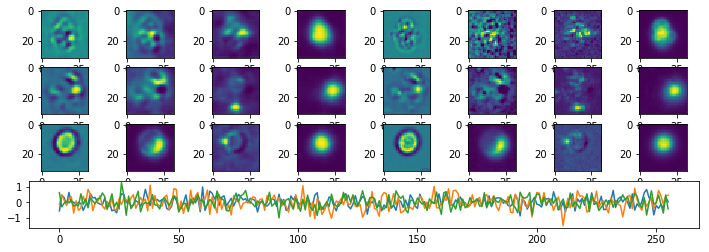

Epoch:  59 Iteration:  0 Loss:  10.7787


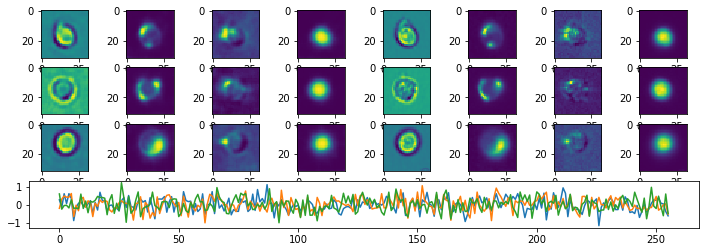

Done


In [7]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0, 1, 2, 4]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.00005  #.00005
p_restore = False
p_latent_size = 256

# enc_sizes = [(8, 7), (16, 5), (32, 3), (64, 3)]
enc_sizes = [(128, 3), (256, 3), (512,3), (1024,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = 0.9

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

autoencoder_train.train(p_mmdict, p_df, params, 800)